In [181]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import pywt.data

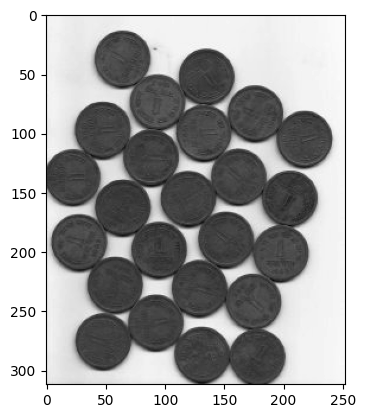

In [182]:
img = cv2.imread('../data/coins.jpg', 0)
plt.imshow(img, cmap='gray')
plt.show()

In [183]:
coeffs = pywt.dwt2(img, 'haar')

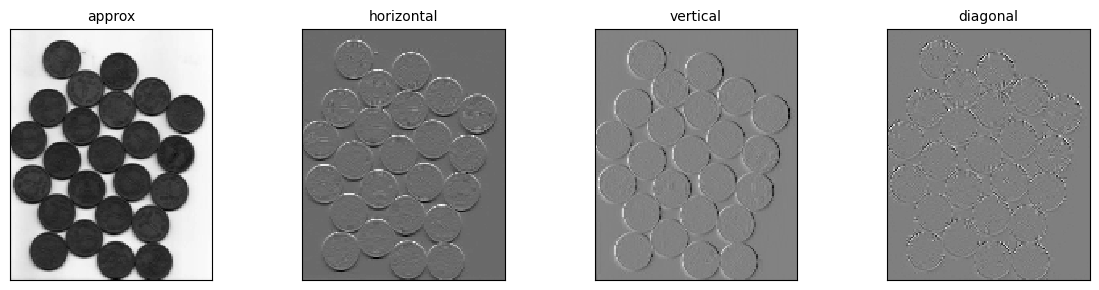

In [184]:
titles = ['approx', 'horizontal', 'vertical', 'diagonal']
LL, (LH, HL, HH) = coeffs
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

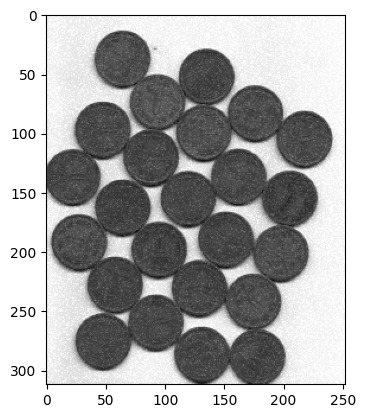

In [185]:
# Generate random Gaussian noise
noise = np.zeros(img.shape, np.uint8)
cv2.randn(noise, 0, 15)

noisy_img = cv2.add(img, noise)
plt.imshow(noisy_img, cmap='gray')
plt.show()



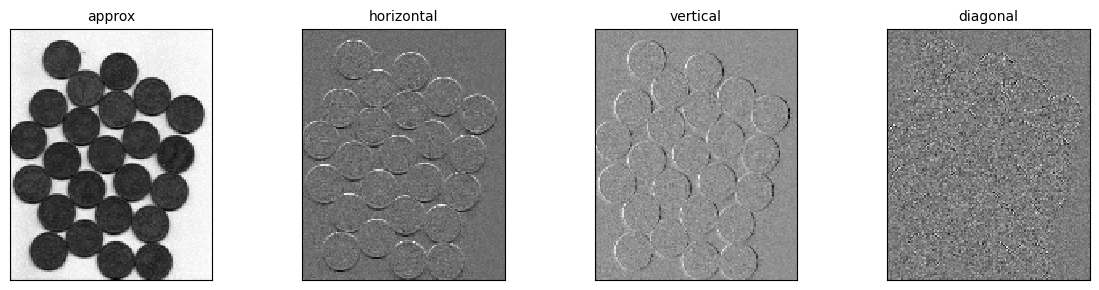

In [186]:
coeffs = pywt.dwt2(noisy_img, 'haar')

titles = ['approx', 'horizontal', 'vertical', 'diagonal']
LL, (LH, HL, HH) = coeffs
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

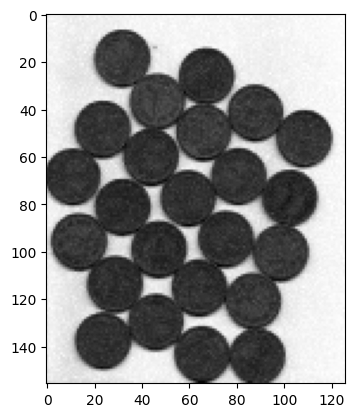

thresholded


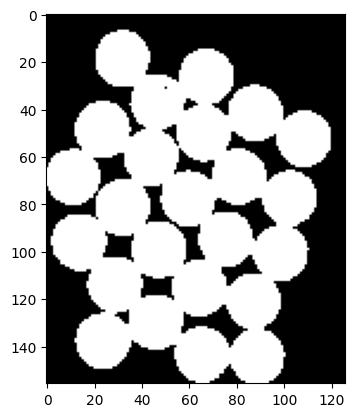

In [187]:
# Manual threshold.
plt.imshow(LL, cmap='gray')
plt.show()

print('thresholded')
thresholded = cv2.threshold(LL, np.max(LL)/2, np.max(LL), cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresholded, cmap='gray')
plt.show()



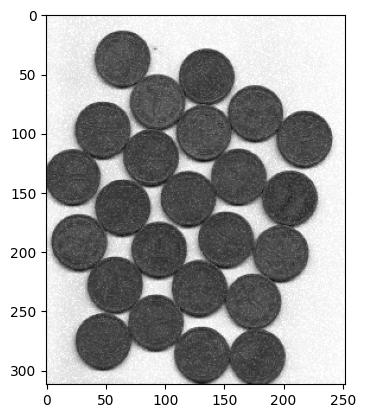

In [188]:
coeffs = pywt.dwt2(noisy_img, 'haar')
LL, (LH, HL, HH) = coeffs

coeffs = LL, (LH, HL, HH)

plt.imshow(pywt.idwt2(coeffs, 'haar'), cmap='gray')
plt.show()

400


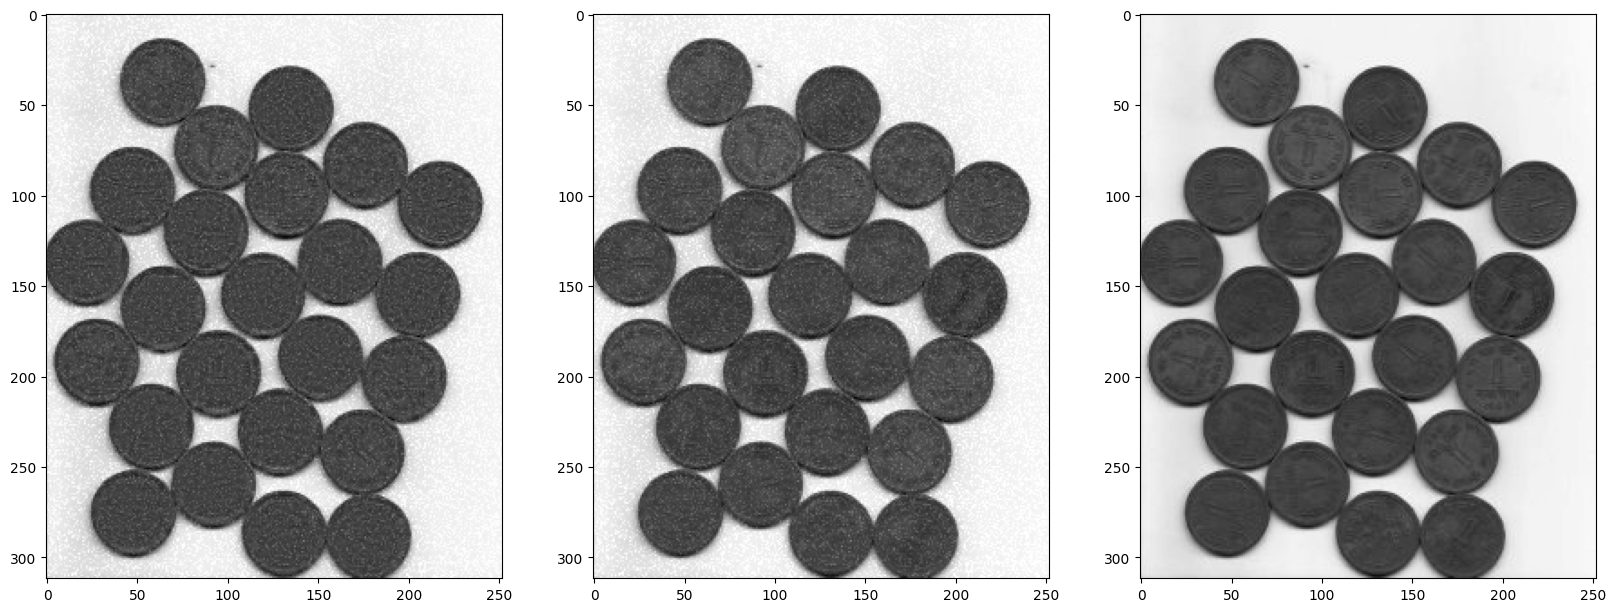

410


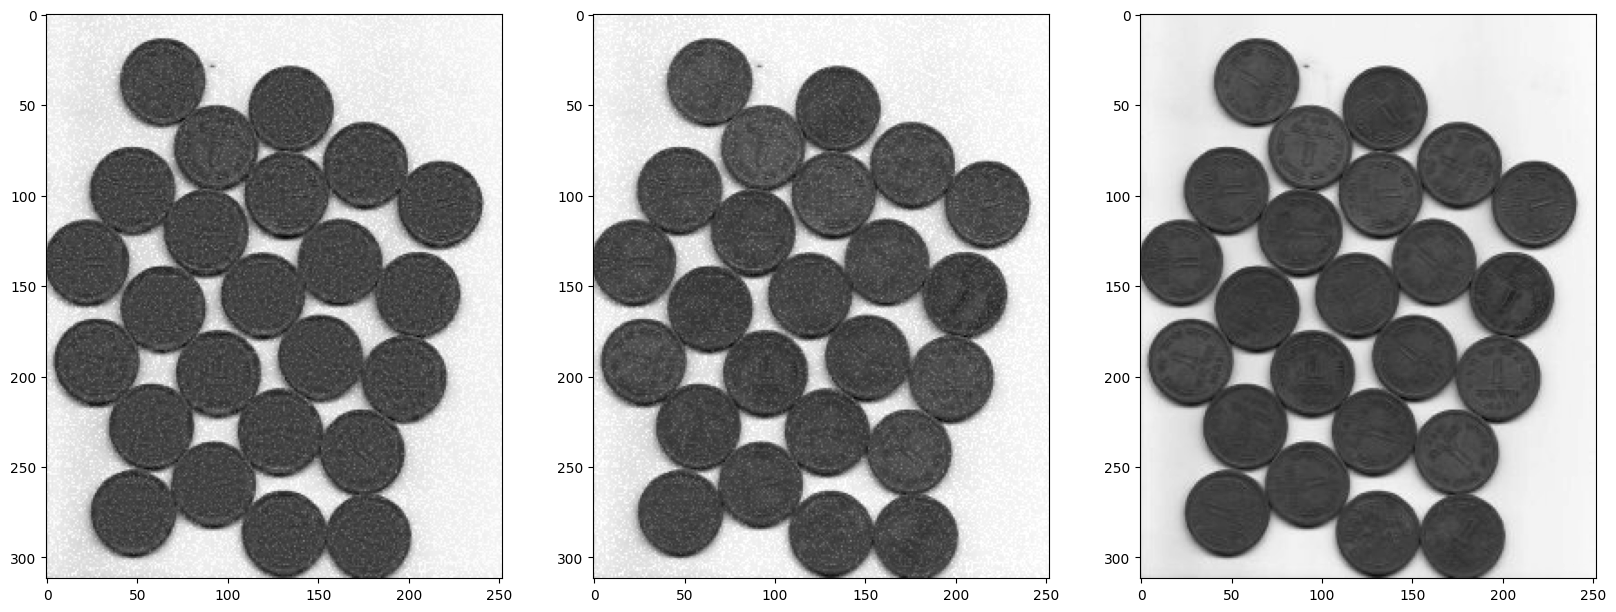

450


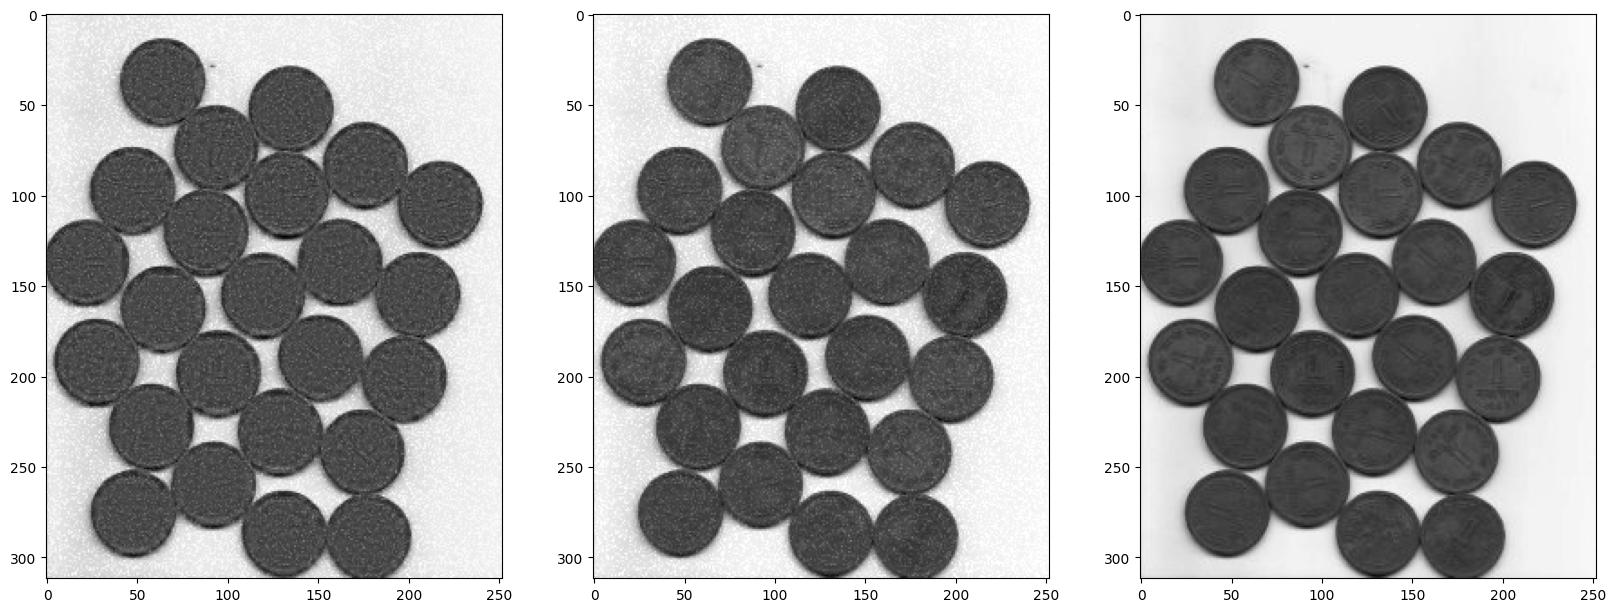

490


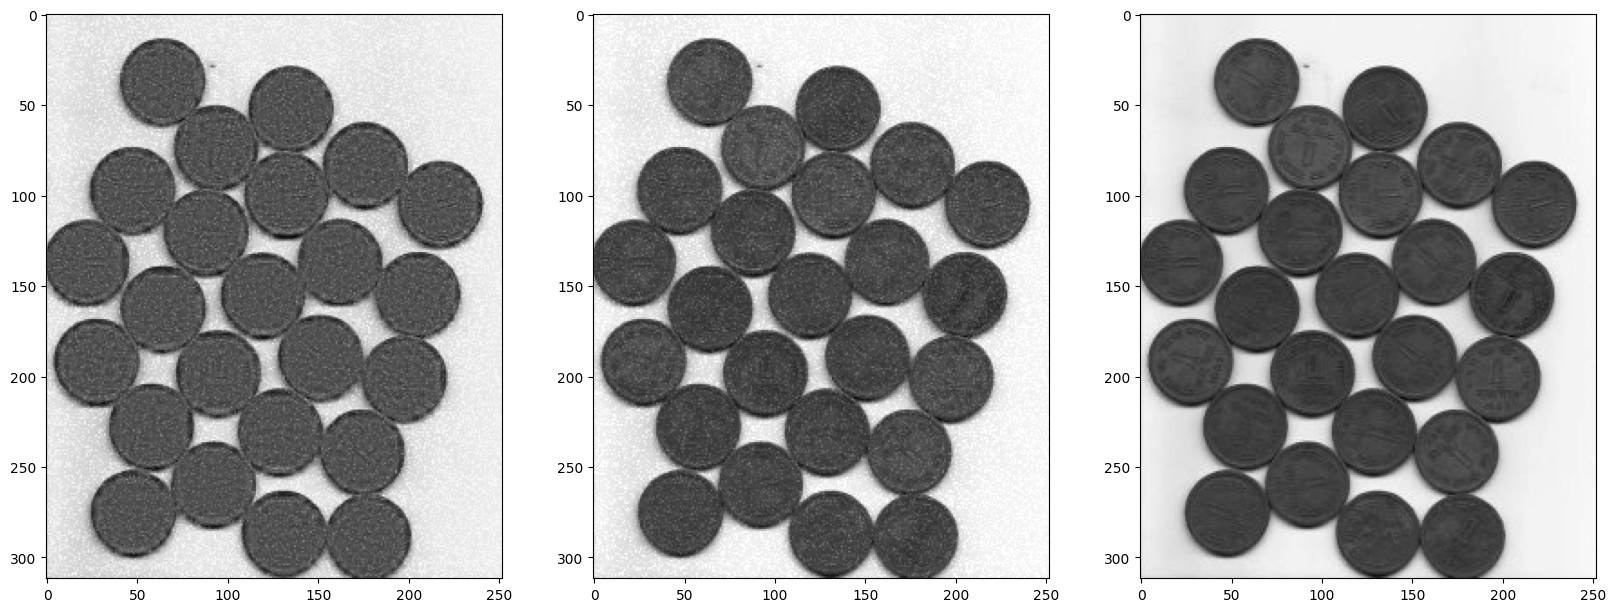

500


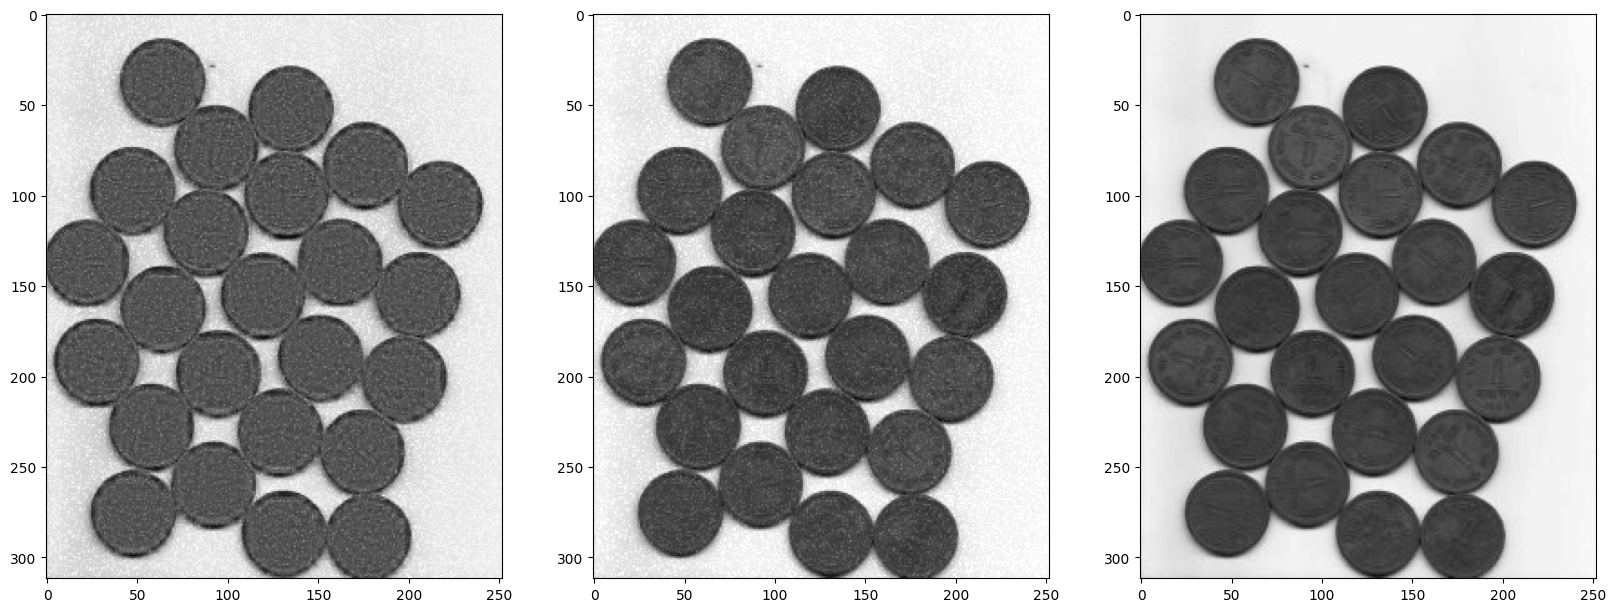

550


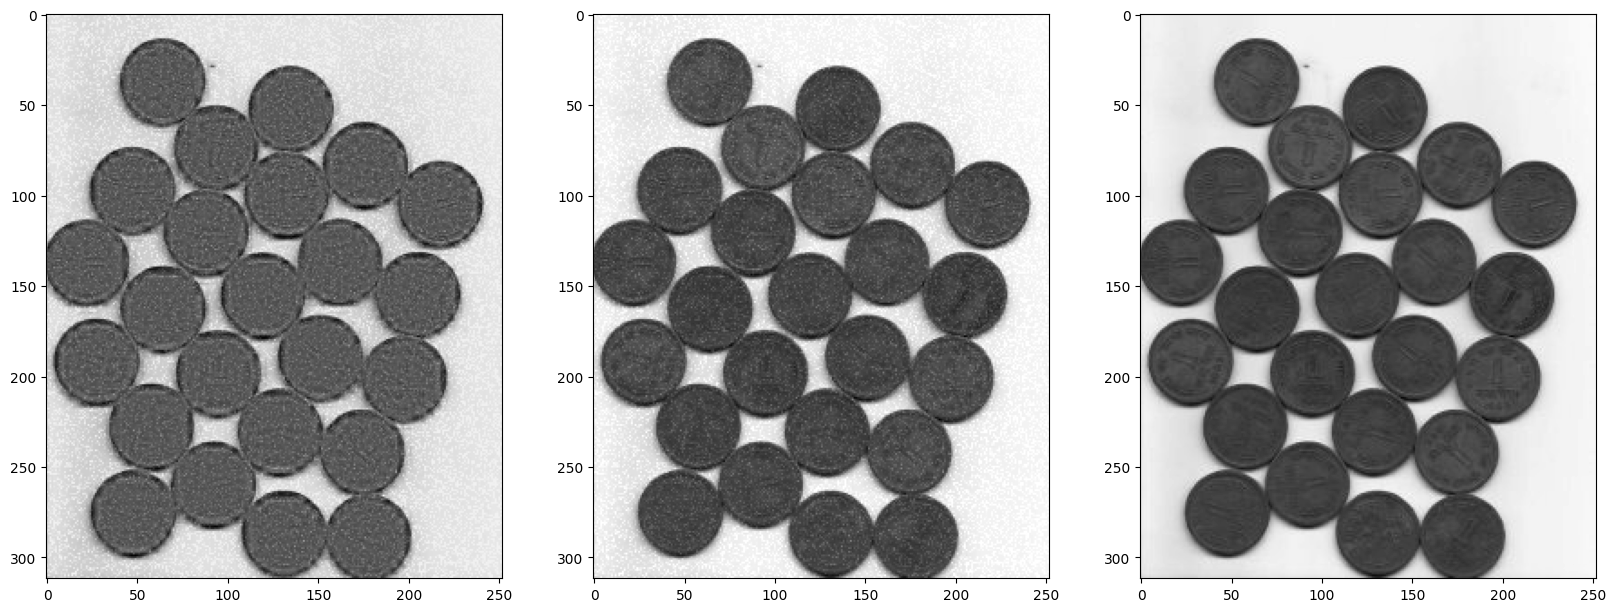

600


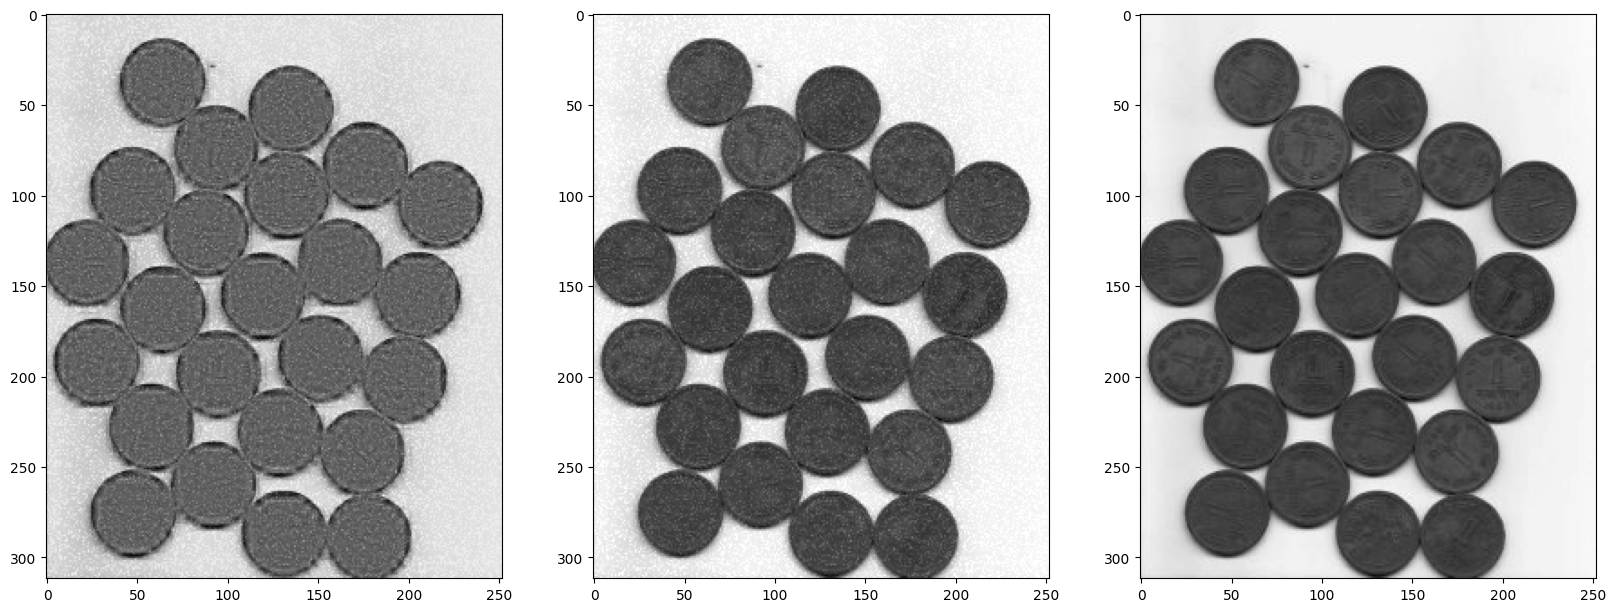

700


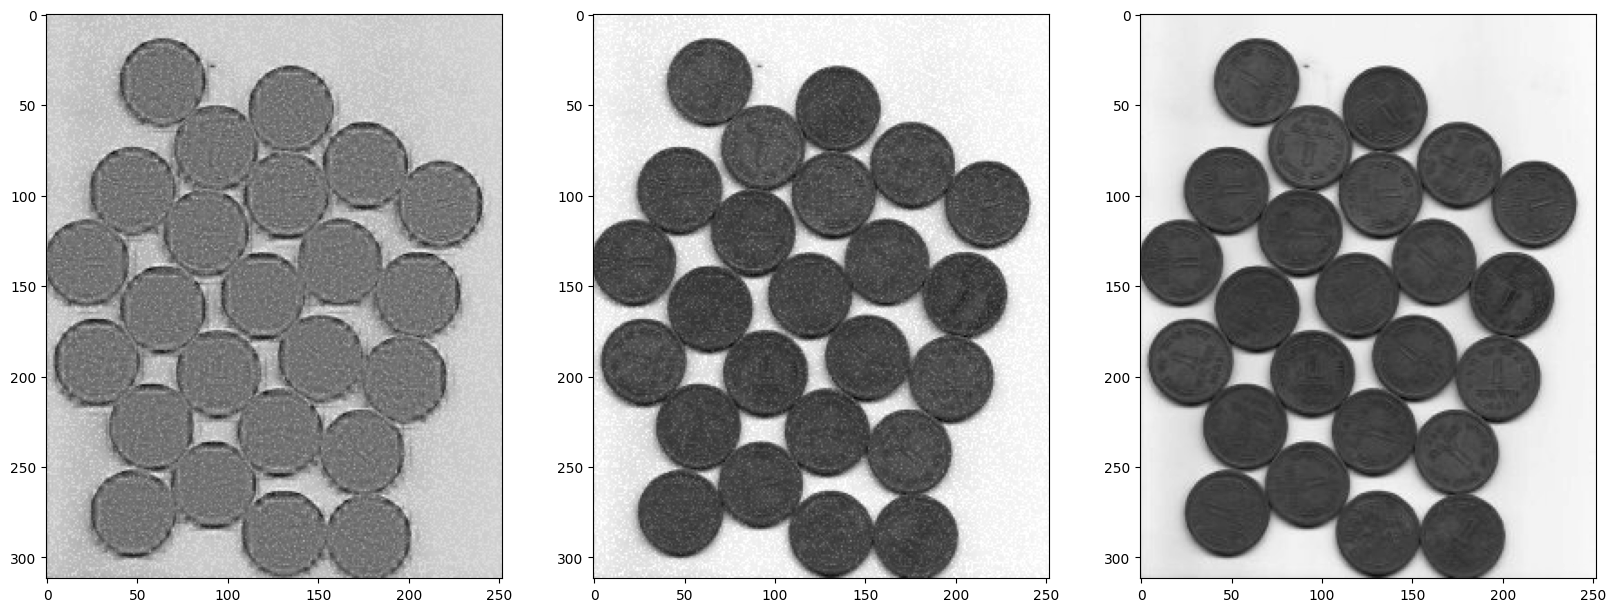

In [200]:
thresholds = [400, 410, 450, 490, 500, 550, 600, 700]

for t in thresholds:
    print(t)
    
    # Perform the wavelet transform (2D Discrete Wavelet Transform)
    coeffs = pywt.wavedec2(noisy_img, 'db2', level=2)

    # Set a threshold to remove noise (you can experiment with different thresholding methods)
    threshold = t  # Adjust this threshold according to your image and noise level

    # Apply thresholding to the coefficients
    coeffs = [pywt.threshold(c, threshold, mode='soft') if isinstance(c, np.ndarray) else c for c in coeffs]

    # Inverse transform to obtain the denoised image
    denoised_image = pywt.waverec2(coeffs, 'db2')

    # Convert the denoised image to 8-bit format (optional)
    plt.figure(figsize=(20, 20)) 
    plt.subplot(131)  # This specifies a 1x3 grid of subplots, and the next plot goes to the first position.
    plt.imshow(denoised_image, cmap='gray')

    # Display the noisy and original images in the remaining subplots
    plt.subplot(132)
    plt.imshow(noisy_img, cmap='gray')

    plt.subplot(133)
    plt.imshow(img, cmap='gray')

    plt.show()


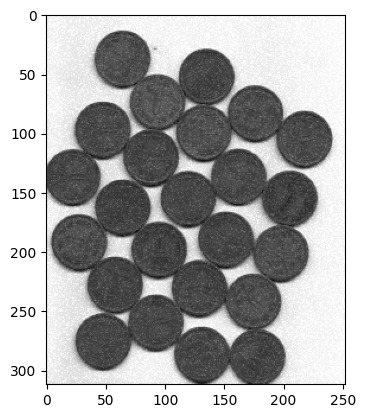

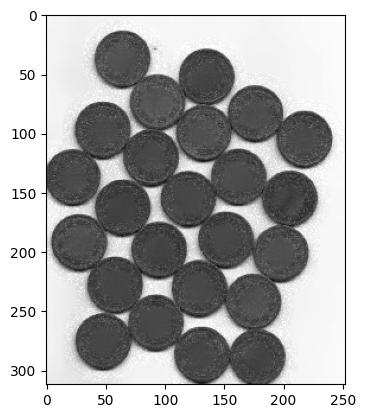

Docstring:
fastNlMeansDenoising(src[, dst[, h[, templateWindowSize[, searchWindowSize]]]]) -> dst
.   @brief Perform image denoising using Non-local Means Denoising algorithm
.   <http://www.ipol.im/pub/algo/bcm_non_local_means_denoising/> with several computational
.   optimizations. Noise expected to be a gaussian white noise
.   
.   @param src Input 8-bit 1-channel, 2-channel, 3-channel or 4-channel image.
.   @param dst Output image with the same size and type as src .
.   @param templateWindowSize Size in pixels of the template patch that is used to compute weights.
.   Should be odd. Recommended value 7 pixels
.   @param searchWindowSize Size in pixels of the window that is used to compute weighted average for
.   given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater
.   denoising time. Recommended value 21 pixels
.   @param h Parameter regulating filter strength. Big h value perfectly removes noise but also
.   removes image details, small

In [190]:
cv2.fastNlMeansDenoising?

plt.imshow(noisy_img, cmap='gray')
plt.show()

plt.imshow(cv2.fastNlMeansDenoising(noisy_img, None, 7, 21), cmap='gray')
plt.show()